In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log2
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
data=pd.read_csv('rnaSeqTPM.tsv',delimiter='\t')
data.head()

,target,AC-10_L001-ds.a84fdb211ec34671aca066ec644cf980,AC-10_L002-ds.2ddd07759d0049598e038c6f5ba208fa,AC-10_L003-ds.c54fbdfec6c64f5f9b34d857bdc2d39b,AC-10_L004-ds.2bd4291178074656a4052e86fe3a627e,AC-1_L001-ds.4e1b9a9de76b4859a777b1e85ee85940,AC-1_L002-ds.01aba20a131d47c1ab69483d8ec077ec,AC-1_L003-ds.88a026919bd04bc5a4216cb9f1c13b9f,AC-1_L004-ds.7f15d836c940438a91be474a714f4b2c,AC-2_L001-ds.857a9a7bb18646108f52f84bc5b08aaf,...,AC-7_L003-ds.90fc01aaf24b45caa6e05a27f56c79a1,AC-7_L004-ds.422324df17bb4355a209d2e206d4ebc0,AC-8_L001-ds.b12e8f44abb04463b2f39d8752f94941,AC-8_L002-ds.a0c59a8dc0f24e30aec2c8d0a17334ca,AC-8_L003-ds.e77040b8045f45478d3aeef2c419abb9,AC-8_L004-ds.04e2a2a871c145e49fb29ada5cf53c09,AC-9_L001-ds.a46dbd8c24a44ddea892e43e28a4ba93,AC-9_L002-ds.bbb091f5bbca4f889ad07186bc5d1f49,AC-9_L003-ds.194a0d6a4ab447dab95363ede97522f3,AC-9_L004-ds.9eb4326b03f84467a6b399d8f09fd9da
0,14266|CENPU,26.5465,16.2036,15.82680,23.04800,4.27284,4.34290,0.00000,0.0000,49.09530,...,3.85098,0.00000,80.97500,61.55940,50.31760,65.41160,2.26704,2.31271,18.11890,6.95662
1,13331|PEX14,14.7797,30.2357,14.57500,20.07720,25.98820,53.11600,34.81970,35.4412,20.75710,...,23.94680,24.49580,9.05497,13.72040,41.40420,27.30500,18.80870,37.86440,14.20190,14.27680
2,6630|RAD52,10.6624,11.1358,14.51280,11.07570,10.32110,7.00181,6.95342,17.4680,25.68350,...,9.45641,6.51098,3.51170,3.51882,8.84862,3.60949,9.13044,14.82380,7.27973,16.71440
3,16802|CLYBL,14.9415,15.5777,5.08468,6.89438,19.27520,3.27223,6.50129,16.3063,2.67345,...,0.00000,12.25740,16.36970,14.76480,14.85800,6.74993,11.92510,5.18773,8.49613,3.46830
4,6645|RANBP1,120.0090,95.8606,115.83400,81.36820,65.89110,52.77280,55.74450,89.2274,436.34000,...,124.60800,83.27780,142.70700,171.49800,198.41100,171.52600,86.65530,105.10300,47.65850,64.37860


In [3]:
data=data.rename(columns={'AC-10_L001-ds.a84fdb211ec34671aca066ec644cf980':'AC10_1',
       'AC-10_L002-ds.2ddd07759d0049598e038c6f5ba208fa':'AC10_2','AC-10_L003-ds.c54fbdfec6c64f5f9b34d857bdc2d39b':'AC10_3',
       'AC-10_L004-ds.2bd4291178074656a4052e86fe3a627e':'AC10_4','AC-1_L001-ds.4e1b9a9de76b4859a777b1e85ee85940':'AC1_1',
       'AC-1_L002-ds.01aba20a131d47c1ab69483d8ec077ec':'AC1_2','AC-1_L003-ds.88a026919bd04bc5a4216cb9f1c13b9f':'AC1_3',
       'AC-1_L004-ds.7f15d836c940438a91be474a714f4b2c':'AC1_4','AC-2_L001-ds.857a9a7bb18646108f52f84bc5b08aaf':'AC2_1',
       'AC-2_L002-ds.5a9da74220064ee89a9736bc85a52179':'AC2_2','AC-2_L003-ds.e6194500d53a4f33bfc7915c64a5beeb':'AC2_3',
       'AC-2_L004-ds.246b173490c3494a8eeea8621ec361d1':'AC2_4','AC-3_L001-ds.58010ec40df84a978e4af7d1a23d1af9':'AC3_1',
       'AC-3_L002-ds.454403b9d0ac4d72af1220546b5a630d':'AC3_2','AC-3_L003-ds.d83a7a6dd4c545b1b2170c1100cf2120':'AC3_3',
       'AC-3_L004-ds.6cf9ff6076264856a74212cfc7410e96':'AC3_4','AC-4_L001-ds.e45254993f044e7da3deb87a28e560a4':'AC4_1',
       'AC-4_L002-ds.fcf9658251c14b40b7ed788a6f9d1adb':'AC4_2','AC-4_L003-ds.109477542e734e6c8c93bedd405a3039':'AC4_3',
       'AC-4_L004-ds.d101269468414b71a926cd9fc76cb004':'AC4_4','AC-5_L001-ds.bd13708d4f784119ac0a2ae972e37f66':'AC5_1',
       'AC-5_L002-ds.ffd221b8bc164be3b6d604985219be02':'AC5_2','AC-5_L003-ds.8d1b59e10e7b4ae7bd089b99744e3802':'AC5_3',
       'AC-5_L004-ds.9b5362075da148408cb715587ce595a5':'AC5_4','AC-6_L001-ds.3ab380d9704849cda96aed57e96e6586':'AC6_1',
       'AC-6_L002-ds.6d19015742374d079236d90ae72f1d2a':'AC6_2','AC-6_L003-ds.f4a789852ddb477bad1ab00670699315':'AC6_3',
       'AC-6_L004-ds.a5e6028617944efd9b68ef878d9df54e':'AC6_4','AC-7_L001-ds.fc6c5f45845543248f39571f54a4fa7b':'AC7_1',
       'AC-7_L002-ds.9da13968f23c45489f6bcee732149847':'AC7_2','AC-7_L003-ds.90fc01aaf24b45caa6e05a27f56c79a1':'AC7_3',
       'AC-7_L004-ds.422324df17bb4355a209d2e206d4ebc0':'AC7_4','AC-8_L001-ds.b12e8f44abb04463b2f39d8752f94941':'AC8_1',
       'AC-8_L002-ds.a0c59a8dc0f24e30aec2c8d0a17334ca':'AC8_2','AC-8_L003-ds.e77040b8045f45478d3aeef2c419abb9':'AC8_3',
       'AC-8_L004-ds.04e2a2a871c145e49fb29ada5cf53c09':'AC8_4','AC-9_L001-ds.a46dbd8c24a44ddea892e43e28a4ba93':'AC9_1',
       'AC-9_L002-ds.bbb091f5bbca4f889ad07186bc5d1f49':'AC9_2','AC-9_L003-ds.194a0d6a4ab447dab95363ede97522f3':'AC9_3',
       'AC-9_L004-ds.9eb4326b03f84467a6b399d8f09fd9da':'AC9_4'})
data.head()

,target,AC10_1,AC10_2,AC10_3,AC10_4,AC1_1,AC1_2,AC1_3,AC1_4,AC2_1,...,AC7_3,AC7_4,AC8_1,AC8_2,AC8_3,AC8_4,AC9_1,AC9_2,AC9_3,AC9_4
0,14266|CENPU,26.5465,16.2036,15.82680,23.04800,4.27284,4.34290,0.00000,0.0000,49.09530,...,3.85098,0.00000,80.97500,61.55940,50.31760,65.41160,2.26704,2.31271,18.11890,6.95662
1,13331|PEX14,14.7797,30.2357,14.57500,20.07720,25.98820,53.11600,34.81970,35.4412,20.75710,...,23.94680,24.49580,9.05497,13.72040,41.40420,27.30500,18.80870,37.86440,14.20190,14.27680
2,6630|RAD52,10.6624,11.1358,14.51280,11.07570,10.32110,7.00181,6.95342,17.4680,25.68350,...,9.45641,6.51098,3.51170,3.51882,8.84862,3.60949,9.13044,14.82380,7.27973,16.71440
3,16802|CLYBL,14.9415,15.5777,5.08468,6.89438,19.27520,3.27223,6.50129,16.3063,2.67345,...,0.00000,12.25740,16.36970,14.76480,14.85800,6.74993,11.92510,5.18773,8.49613,3.46830
4,6645|RANBP1,120.0090,95.8606,115.83400,81.36820,65.89110,52.77280,55.74450,89.2274,436.34000,...,124.60800,83.27780,142.70700,171.49800,198.41100,171.52600,86.65530,105.10300,47.65850,64.37860


In [4]:
n=1
m=5
p=1
for _ in range(10):
    
    data[f'AC{p}']=data.iloc[:,n:m].mean(axis=1)
    p=p+1
    n=n+4
    m=m+4

data=data.rename(columns={'AC1':'AC10','AC2':'AC1','AC3':'AC2','AC4':'AC3','AC5':'AC4','AC6':'AC5','AC7':'AC6','AC8':'AC7',
                     'AC9':'AC8','AC10':'AC9'})
data.head()

,target,AC10_1,AC10_2,AC10_3,AC10_4,AC1_1,AC1_2,AC1_3,AC1_4,AC2_1,...,AC10,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9
0,14266|CENPU,26.5465,16.2036,15.82680,23.04800,4.27284,4.34290,0.00000,0.0000,49.09530,...,20.406225,2.153935,42.743575,51.583525,18.622583,3.504800,58.203800,1.938013,64.565900,7.413818
1,13331|PEX14,14.7797,30.2357,14.57500,20.07720,25.98820,53.11600,34.81970,35.4412,20.75710,...,19.916900,37.341275,15.845198,15.942073,51.209025,17.724160,23.905800,20.258400,22.871142,21.287950
2,6630|RAD52,10.6624,11.1358,14.51280,11.07570,10.32110,7.00181,6.95342,17.4680,25.68350,...,11.846675,10.436083,21.691725,13.252975,7.072937,5.070735,7.610290,11.173897,4.872158,11.987092
3,16802|CLYBL,14.9415,15.5777,5.08468,6.89438,19.27520,3.27223,6.50129,16.3063,2.67345,...,10.624565,11.338755,8.822482,4.750612,20.617875,26.773325,9.021778,4.565878,13.185607,7.269315
4,6645|RANBP1,120.0090,95.8606,115.83400,81.36820,65.89110,52.77280,55.74450,89.2274,436.34000,...,103.267950,65.908950,346.465250,226.077000,127.275900,48.031900,102.964925,89.185500,171.035500,75.948850


In [5]:
data_m=data[['target','AC1','AC2','AC3','AC4','AC5','AC6','AC7','AC8','AC9','AC10']]
data_m=data_m.rename(columns={'target':'target gene','AC1':'Brain','AC2':'Univ Stratagene','AC3':'Univ DriverMap',
                             'AC4':'Univ Clontech','AC5':'Univ BioChain','AC6':'Univ Rare','AC7':'WB-Activated',
                             'AC8':'WB-Disease','AC9':'Univ ImmuneT10','AC10':'Hemat System3'})
data_m.head()

,target gene,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
0,14266|CENPU,2.153935,42.743575,51.583525,18.622583,3.504800,58.203800,1.938013,64.565900,7.413818,20.406225
1,13331|PEX14,37.341275,15.845198,15.942073,51.209025,17.724160,23.905800,20.258400,22.871142,21.287950,19.916900
2,6630|RAD52,10.436083,21.691725,13.252975,7.072937,5.070735,7.610290,11.173897,4.872158,11.987092,11.846675
3,16802|CLYBL,11.338755,8.822482,4.750612,20.617875,26.773325,9.021778,4.565878,13.185607,7.269315,10.624565
4,6645|RANBP1,65.908950,346.465250,226.077000,127.275900,48.031900,102.964925,89.185500,171.035500,75.948850,103.267950


In [6]:
data_count=data_m['target gene'].count()
data_m=data_m.set_index('target gene')

Is there a noticeable difference in high/medium/low abundance of transcription expression detection ability for DM and RS? Plot: Heatmaps with log2 of reads and figure out thresholds (Both refine data. Leeza - DM samples, Luc - RS samples)

In [7]:
def log_df(df):
    columns_list=df.columns
    for column in columns_list:
        col_name=column+'_log'
        col_numbers=list(df[column])
        log_numbers=[]
        for num in col_numbers:
            if num>1:
                log_numbers.append(log2(num))
            else:
                log_numbers.append(0)
        df[col_name]=log_numbers
    return 

In [8]:
data_m2=data_m
log_df(data_m2)
data_m2.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
target gene,,,,,,,,,,,,,,,,,,,,
14266|CENPU,2.153935,42.743575,51.583525,18.622583,3.504800,58.203800,1.938013,64.565900,7.413818,20.406225,1.106975,5.417636,5.688838,4.218981,1.809332,5.863041,0.954578,6.012701,2.890217,4.350937
13331|PEX14,37.341275,15.845198,15.942073,51.209025,17.724160,23.905800,20.258400,22.871142,21.287950,19.916900,5.222699,3.985974,3.994767,5.678326,4.147645,4.579289,4.340448,4.515457,4.411965,4.315921
6630|RAD52,10.436083,21.691725,13.252975,7.072937,5.070735,7.610290,11.173897,4.872158,11.987092,11.846675,3.383508,4.439073,3.728244,2.822310,2.342195,2.927951,3.482061,2.284561,3.583410,3.566410
16802|CLYBL,11.338755,8.822482,4.750612,20.617875,26.773325,9.021778,4.565878,13.185607,7.269315,10.624565,3.503190,3.141185,2.248114,4.365824,4.742724,3.173412,2.190892,3.720892,2.861819,3.409332
6645|RANBP1,65.908950,346.465250,226.077000,127.275900,48.031900,102.964925,89.185500,171.035500,75.948850,103.267950,6.042402,8.436567,7.820670,6.991815,5.585921,6.686009,6.478737,7.418152,6.246956,6.690249


In [9]:
data_log=data_m2.iloc[:,10:20]
data_log.head()

,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
target gene,,,,,,,,,,
14266|CENPU,1.106975,5.417636,5.688838,4.218981,1.809332,5.863041,0.954578,6.012701,2.890217,4.350937
13331|PEX14,5.222699,3.985974,3.994767,5.678326,4.147645,4.579289,4.340448,4.515457,4.411965,4.315921
6630|RAD52,3.383508,4.439073,3.728244,2.822310,2.342195,2.927951,3.482061,2.284561,3.583410,3.566410
16802|CLYBL,3.503190,3.141185,2.248114,4.365824,4.742724,3.173412,2.190892,3.720892,2.861819,3.409332
6645|RANBP1,6.042402,8.436567,7.820670,6.991815,5.585921,6.686009,6.478737,7.418152,6.246956,6.690249


In [10]:
tab=data_log.transpose()
tab.head()

target gene,14266|CENPU,13331|PEX14,6630|RAD52,16802|CLYBL,6645|RANBP1,12149|KDF1,11733|TBC1D30,14535|TMEM258,12400|LRG1,11931|HYAL1,...,16176|GAB3,13299|ZNF701,5706|NEB,15110|ZNF775,3181|CCNB2,16735|BBS12,14784|ANKRD27,3464|COL19A1,10238|TCTA,10545|CA5A
Brain_log,1.106975,5.222699,3.383508,3.503190,6.042402,2.245839,5.061035,6.693610,0.000000,4.054180,...,0.000000,2.075561,0.337782,5.139967,0.000000,2.449345,4.636225,3.332654,4.913491,0.000000
Univ Stratagene_log,5.417636,3.985974,4.439073,3.141185,8.436567,2.963911,2.822148,8.210013,4.251886,3.756653,...,0.685171,1.289013,0.064607,3.983449,6.592308,0.000000,4.254808,0.000000,3.761934,0.000000
Univ DriverMap_log,5.688838,3.994767,3.728244,2.248114,7.820670,4.729278,3.648200,7.627450,3.118327,0.785576,...,0.000000,2.836249,1.458984,3.313137,6.048997,0.793720,5.592719,0.000000,4.562096,0.000000
Univ Clontech_log,4.218981,5.678326,2.822310,4.365824,6.991815,1.497970,3.318626,6.803169,3.478247,5.185426,...,2.567949,1.039789,1.540372,4.355929,4.513309,2.231803,5.537454,0.849012,4.562743,0.000000
Univ BioChain_log,1.809332,4.147645,2.342195,4.742724,5.585921,1.712148,0.695954,6.224163,7.465277,6.353782,...,0.000000,2.461696,0.000000,1.378955,1.755232,0.178158,3.819152,0.000000,4.572714,4.058026


In [14]:
leeza=pd.read_csv('DriverMapTPM.tsv',delimiter='\t')
leeza=leeza.rename(columns={'Unnamed: 0':'target gene'})
leeza=leeza.set_index('target gene')
leeza.head()

,A10,A11,A12,A2,A3,A4,A5,A6,A7,A8,...,B11,B12,B2,B3,B4,B5,B6,B7,B8,B9
target gene,,,,,,,,,,,,,,,,,,,,,
14266|CENPU,17.60490,23.53280,0.000,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,...,20.49390,0.00000,0.546198,48.0853,74.59220,26.27370,1.19616,45.71820,2.83643,122.2470
13331|PEX14,19.08750,14.08670,0.000,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,...,17.62190,0.00000,33.521000,26.2342,24.65790,36.15540,15.84860,18.20870,14.82460,34.4379
6630|RAD52,3.66106,4.29017,0.000,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,...,6.29135,3.60232,7.170180,10.8381,6.08676,6.61974,3.46454,7.99667,2.27730,8.2883
16802|CLYBL,11.47500,12.58540,34.475,16.894700,14.28180,4.92852,30.36700,28.94250,15.52040,7.25044,...,9.44277,38.90040,11.170000,12.2971,4.87524,24.46830,21.38690,12.00770,3.81662,16.9272
6645|RANBP1,71.64050,79.22280,0.000,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,...,66.10810,7.38547,35.480200,105.3570,93.05350,46.65610,24.73280,47.38680,41.90630,118.2290


In [27]:
data_dm=leeza.iloc[:,0:11]
data_dm=data_dm[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11']]
data_dm.columns=['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain','Univ Rare',
                'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3']
data_dm.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
target gene,,,,,,,,,,
14266|CENPU,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,96.96370,17.60490,23.53280
13331|PEX14,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,29.29620,19.08750,14.08670
6630|RAD52,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,4.92102,3.66106,4.29017
16802|CLYBL,16.894700,14.28180,4.92852,30.36700,28.94250,15.52040,7.25044,18.39990,11.47500,12.58540
6645|RANBP1,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,134.60400,71.64050,79.22280


In [28]:
log_df(data_dm)
data_dm.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
target gene,,,,,,,,,,,,,,,,,,,,
14266|CENPU,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,96.96370,17.60490,23.53280,0.000000,5.429904,6.139740,4.420557,0.192889,5.559556,0.523030,6.599373,4.137905,4.556601
13331|PEX14,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,29.29620,19.08750,14.08670,4.790350,4.643897,4.115940,4.691986,3.635987,4.176331,3.395131,4.872642,4.254556,3.816262
6630|RAD52,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,4.92102,3.66106,4.29017,2.398919,2.805206,1.714127,2.295414,0.622256,2.421525,0.798971,2.298957,1.872261,2.101035
16802|CLYBL,16.894700,14.28180,4.92852,30.36700,28.94250,15.52040,7.25044,18.39990,11.47500,12.58540,4.078499,3.836106,2.301154,4.924432,4.855118,3.956094,2.858069,4.201626,3.520422,3.653679
6645|RANBP1,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,134.60400,71.64050,79.22280,5.523496,7.772070,7.165520,6.359249,4.952082,6.135865,5.686526,7.072577,6.162704,6.307844


In [37]:
data_dm_log=data_dm.iloc[:,10:20]
data_dm_log.columns=['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain','Univ Rare',
                'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3']
data_dm_log.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
target gene,,,,,,,,,,
14266|CENPU,0.000000,5.429904,6.139740,4.420557,0.192889,5.559556,0.523030,6.599373,4.137905,4.556601
13331|PEX14,4.790350,4.643897,4.115940,4.691986,3.635987,4.176331,3.395131,4.872642,4.254556,3.816262
6630|RAD52,2.398919,2.805206,1.714127,2.295414,0.622256,2.421525,0.798971,2.298957,1.872261,2.101035
16802|CLYBL,4.078499,3.836106,2.301154,4.924432,4.855118,3.956094,2.858069,4.201626,3.520422,3.653679
6645|RANBP1,5.523496,7.772070,7.165520,6.359249,4.952082,6.135865,5.686526,7.072577,6.162704,6.307844


In [30]:
data_log.head()

,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
target gene,,,,,,,,,,
14266|CENPU,1.106975,5.417636,5.688838,4.218981,1.809332,5.863041,0.954578,6.012701,2.890217,4.350937
13331|PEX14,5.222699,3.985974,3.994767,5.678326,4.147645,4.579289,4.340448,4.515457,4.411965,4.315921
6630|RAD52,3.383508,4.439073,3.728244,2.822310,2.342195,2.927951,3.482061,2.284561,3.583410,3.566410
16802|CLYBL,3.503190,3.141185,2.248114,4.365824,4.742724,3.173412,2.190892,3.720892,2.861819,3.409332
6645|RANBP1,6.042402,8.436567,7.820670,6.991815,5.585921,6.686009,6.478737,7.418152,6.246956,6.690249


In [31]:
tab_dm=data_dm_log.transpose()
tab_dm.head()

target gene,14266|CENPU,13331|PEX14,6630|RAD52,16802|CLYBL,6645|RANBP1,12149|KDF1,11733|TBC1D30,14535|TMEM258,12400|LRG1,11931|HYAL1,...,16176|GAB3,13299|ZNF701,5706|NEB,15110|ZNF775,3181|CCNB2,16735|BBS12,14784|ANKRD27,3464|COL19A1,10238|TCTA,10545|CA5A
Brain_log,0.000000,4.790350,2.398919,4.078499,5.523496,1.228763,4.103053,6.710173,0.000000,1.276145,...,0.306146,1.214970,0.332553,3.694891,0.000000,2.398799,5.263639,1.572458,4.136503,0.000000
Univ Stratagene_log,5.429904,4.643897,2.805206,3.836106,7.772070,1.961342,2.042179,8.095830,2.952479,3.981332,...,1.133307,1.688910,0.000000,3.407176,3.999648,0.966903,5.717493,0.000000,3.399294,0.560686
Univ DriverMap_log,6.139740,4.115940,1.714127,2.301154,7.165520,3.665779,3.331720,7.717162,2.640952,0.699054,...,0.000000,2.022876,0.497485,1.224682,3.687833,1.068299,5.943832,0.000000,3.814048,0.000000
Univ Clontech_log,4.420557,4.691986,2.295414,4.924432,6.359249,2.496324,2.617870,6.586897,2.452421,4.728546,...,2.585083,0.755546,0.000000,3.172569,2.424041,1.751399,5.473982,0.000000,4.217626,0.000000
Univ BioChain_log,0.192889,3.635987,0.622256,4.855118,4.952082,1.895225,0.000000,5.822544,6.381131,6.184342,...,0.996779,0.895566,0.289598,0.508003,0.000000,0.000000,3.774924,0.000000,3.042280,3.868736


Text(0.5, 1.0, 'Heatmap for DM')

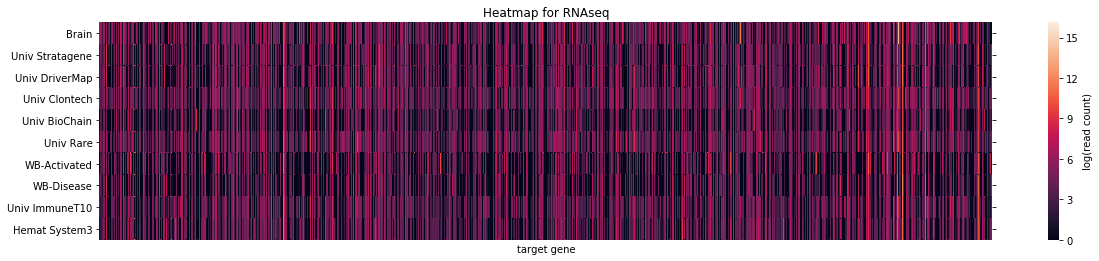

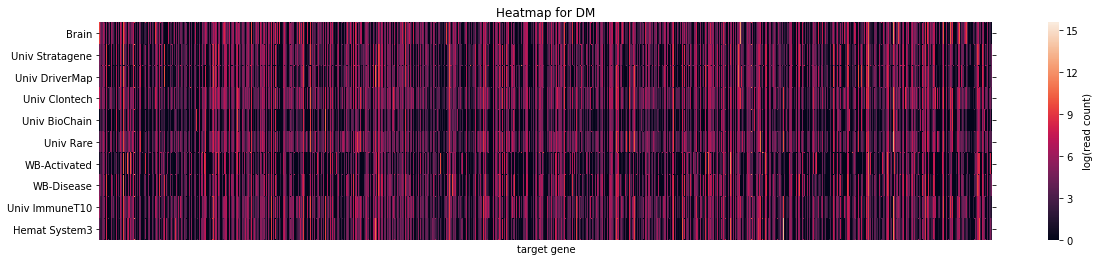

In [80]:
plt.figure(figsize=(20,4))
labels=list(data_dm_log.columns)
sns.heatmap(tab,xticklabels=False,yticklabels=labels,cbar_kws={'label':'log(read count)'})
plt.title('Heatmap for RNAseq')
plt.figure(figsize=(20,4))
sns.heatmap(tab_dm,xticklabels=False,yticklabels=labels,cbar_kws={'label':'log(read count)'})
plt.title('Heatmap for DM')

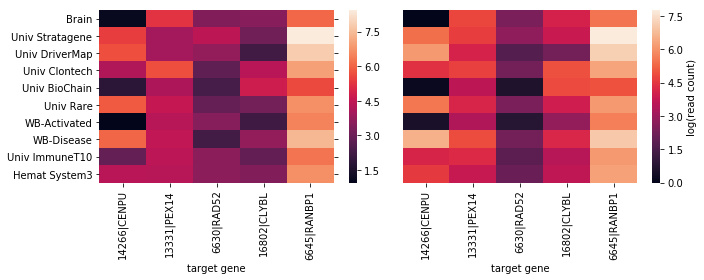

In [84]:
# Just smaller sample, to see how heatmaps looks for just 5 genes
mini_log=data_log.head()
mini_log=mini_log.transpose()
mini_dm_log=data_dm_log.head()
mini_dm_log=mini_dm_log.transpose()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(mini_log, yticklabels=labels) 
plt.subplot(1,2,2)
sns.heatmap(mini_dm_log,yticklabels=False,cbar_kws={'label':'log(read count)'})
plt.tight_layout()

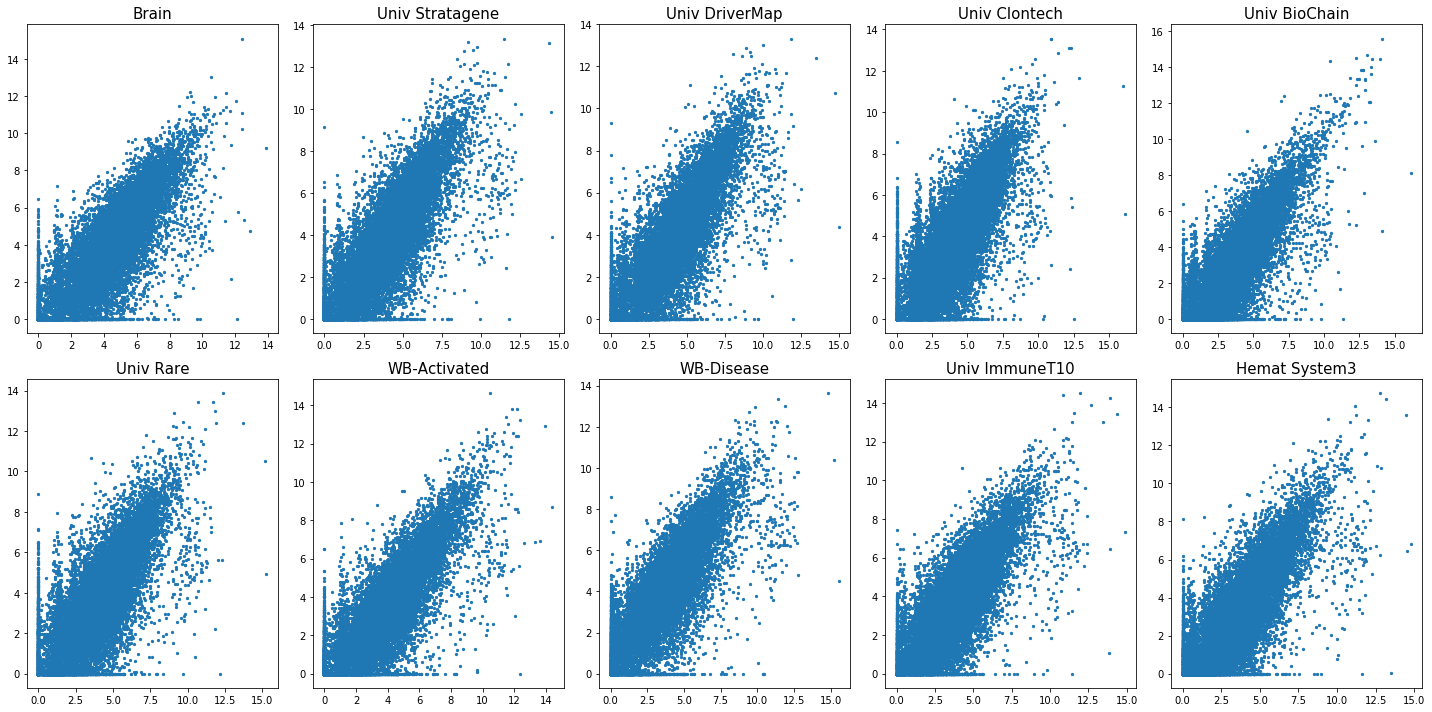

In [42]:
# Scatter plots RNAseq vs DM
fig, ax = plt.subplots(2,5,figsize=(20,10))
n=0

for i in range(2):
    for j in range(5):
        ax[i,j].scatter(x=data_log.iloc[:,n],y=data_dm_log.iloc[:,n],s=5)
        ax[i,j].set_title(labels[n],fontsize=15)
        n=n+1

plt.tight_layout()

C:\Users\luron\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


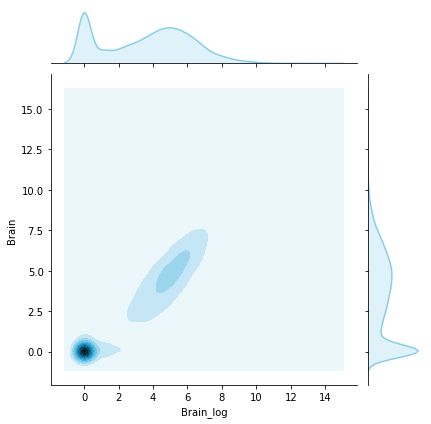

In [43]:
sns.jointplot(x=data_log['Brain_log'],y=data_dm_log['Brain'],color='skyblue',kind='kde')

Next step would be to separate genes into bins for low/medium/high expression levels (figure out thresholds here) and then compare DM vs RS for each bin

In [45]:
data_log.describe()

,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
count,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000
mean,3.629963,3.280922,3.257903,3.844618,2.915842,3.758131,2.820843,2.666063,3.423367,3.243733
std,2.587913,2.550655,2.630829,2.265241,2.458019,2.327459,2.709500,2.598986,2.345787,2.440710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.118536,0.498149,0.000000,2.342039,0.063762,2.102677,0.000000,0.000000,1.566802,0.762984
50%,4.016856,3.534752,3.512316,4.123390,2.945600,4.046395,2.638276,2.462475,3.606753,3.428977
75%,5.582920,5.185687,5.255339,5.433558,4.632353,5.378845,4.921621,4.676655,5.018108,4.981470
max,13.903312,14.583315,14.943352,16.085180,16.124078,15.296279,14.428116,15.530854,14.854120,14.756254


In [46]:
data_dm_log.describe()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
count,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000,18989.000000
mean,3.303398,3.188368,3.052194,3.619161,2.473418,3.512247,2.509879,2.876089,3.262681,2.953104
std,2.671991,2.652274,2.719164,2.446643,2.471288,2.461600,2.703281,2.780757,2.494558,2.558000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228763,0.287638,0.000000,1.642133,0.000000,1.491602,0.000000,0.000000,1.003912,0.124169
50%,3.363886,3.154074,2.942548,3.687845,2.055345,3.576329,1.743468,2.562851,3.253971,2.803502
75%,5.359627,5.221169,5.153226,5.389577,4.184590,5.284540,4.519234,5.084013,5.054892,4.807824
max,15.099557,13.344532,13.315348,13.558564,15.569598,13.873098,14.635486,13.637191,14.502770,14.745118


In [119]:
bins=[-1,0,5,10,17]
bin_labels=['no read','low','medium','high']

def bin_logs(df):
    bin_data={}
    bin_group={}
    for i in list(df.columns):
        bin_data[i]=pd.cut(df[i],bins,labels=bin_labels)
    bin_dataf=pd.DataFrame.from_dict(bin_data)
    for j in list(bin_dataf.columns):
        gr_count=bin_dataf.groupby(j)[j].count()
        bin_group[j]=gr_count
    final_d=pd.DataFrame.from_dict(bin_group)
    
    return final_d

In [120]:
binned_data=bin_logs(data_log)
binned_data

,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
no read,3973,4418,4832,2393,4693,2636,6585,6406,2998,3841
low,8496,9253,8670,10311,10455,10264,7830,8602,11192,10466
medium,6450,5186,5362,6230,3728,5987,4435,3833,4665,4544
high,70,132,125,55,113,102,139,148,134,138


In [121]:
binned_dm_data=bin_logs(data_dm_log)
binned_dm_data

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
no read,4554,4370,5439,2516,5909,2840,7029,6485,3511,4606
low,8807,9396,8505,10688,9829,10618,8026,7586,10610,10066
medium,5547,5114,4930,5697,3136,5431,3812,4805,4767,4192
high,81,109,115,88,115,100,122,113,101,125


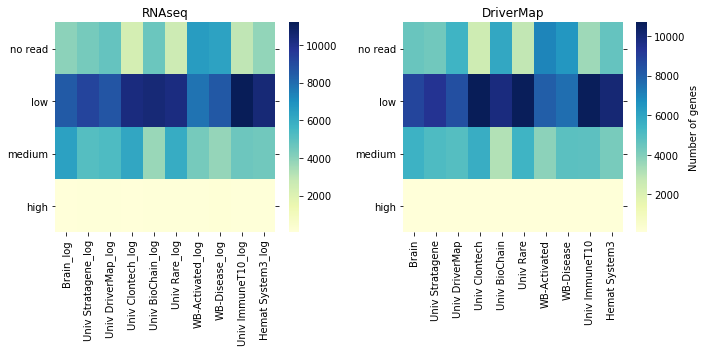

In [122]:
fig = plt.figure(figsize = (10,5)) # width x height
ax1 = fig.add_subplot(1, 2, 1) # row, column, position
ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(binned_data,cmap='YlGnBu',ax=ax1) 
plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)
ax1.set_title('RNAseq')
sns.heatmap(binned_dm_data,cmap='YlGnBu', ax=ax2, cbar_kws={'label':'Number of genes'})
plt.setp(ax2.yaxis.get_majorticklabels(), rotation=0)
ax2.set_title('DriverMap')
plt.tight_layout()

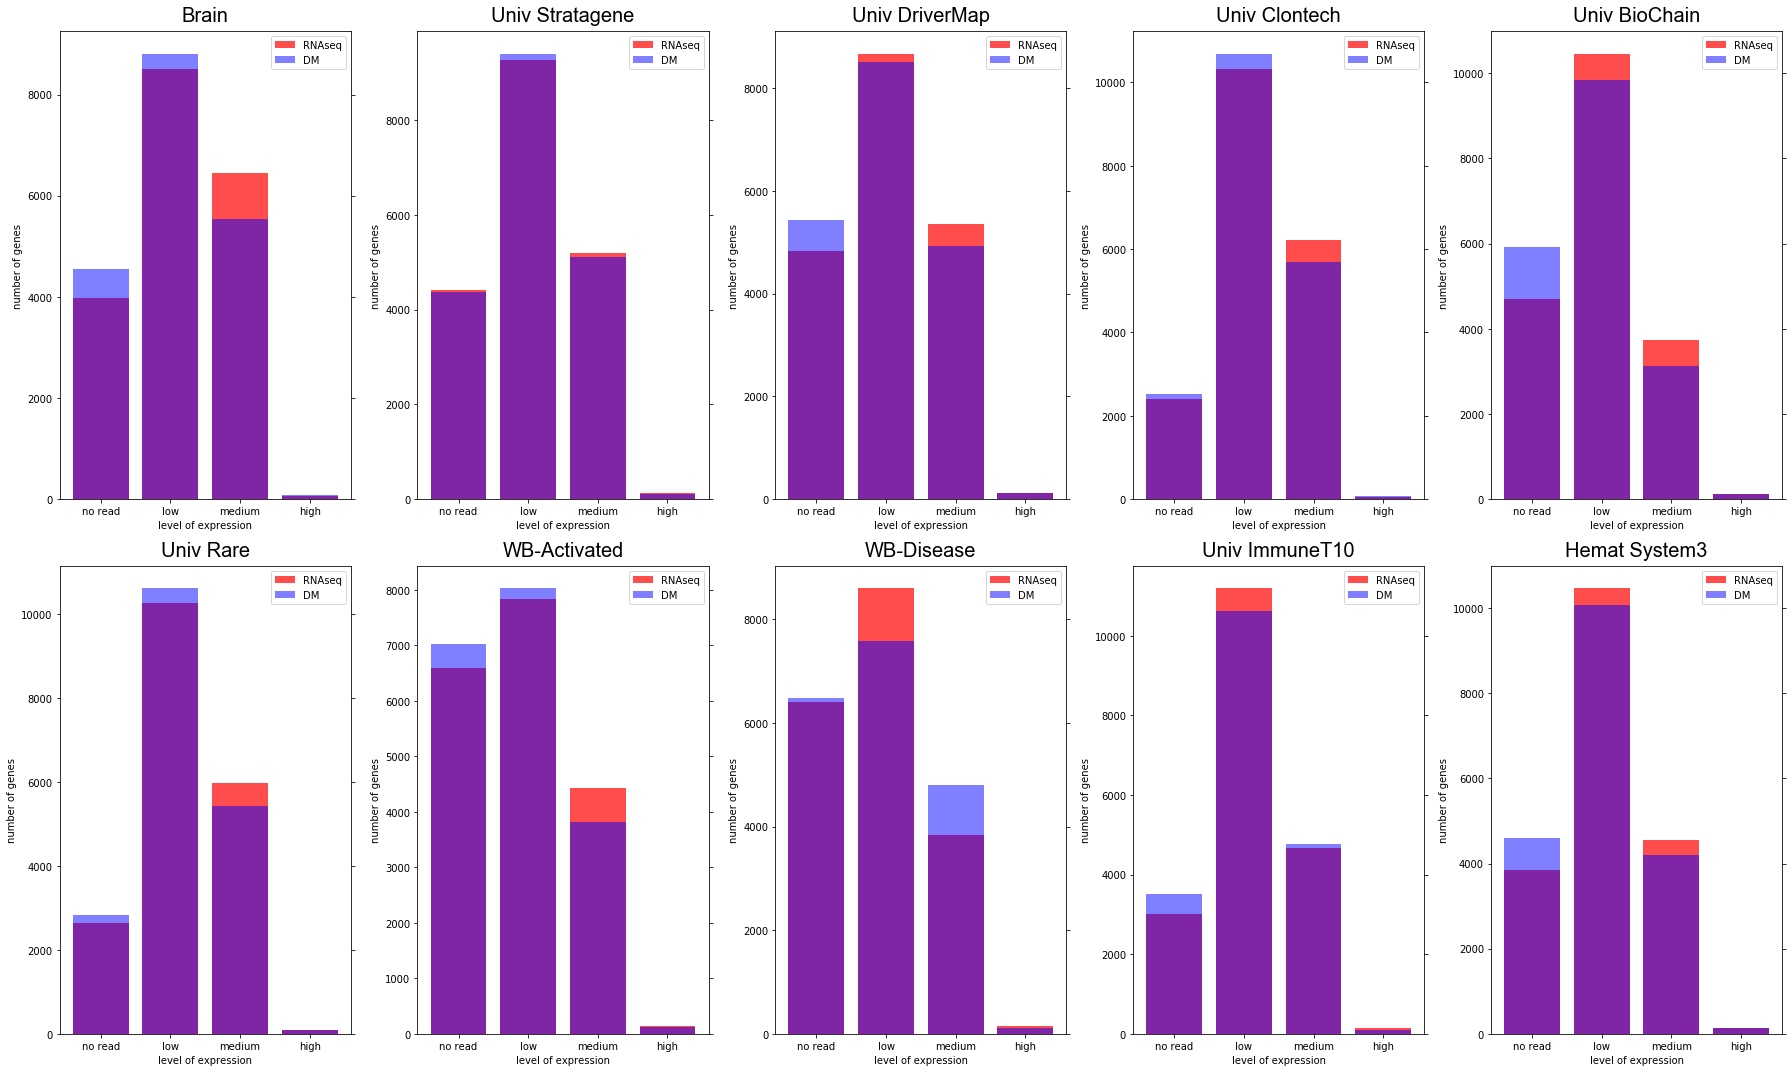

In [123]:
plt.figure(figsize=(25,15))
for i in range(10):
    title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal','verticalalignment':'bottom'}
    plt.subplot(2,5,i+1)
    plt.bar(x=binned_data.index, height=binned_data.iloc[:,i], alpha=0.7, color='red',label='RNAseq')
    plt.bar(x=binned_data.index, height=binned_dm_data.iloc[:,i], alpha=0.5, color='blue',label='DM')
    plt.title(binned_dm_data.columns[i],**title_font)
    plt.xlabel('level of expression')
    plt.ylabel('number of genes')
    plt.legend()
plt.tight_layout()

DM seems to have more genes unread than RNAseq

TPM per gene per sample plot. Do regression Plot: Bar plot + regressions. I DON'T REMEMBER WHAT WE WANTED TO DO WITH THIS!

In [109]:
data_tpm=data_m.iloc[:,0:10]
data_tpm.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
target gene,,,,,,,,,,
14266|CENPU,2.153935,42.743575,51.583525,18.622583,3.504800,58.203800,1.938013,64.565900,7.413818,20.406225
13331|PEX14,37.341275,15.845198,15.942073,51.209025,17.724160,23.905800,20.258400,22.871142,21.287950,19.916900
6630|RAD52,10.436083,21.691725,13.252975,7.072937,5.070735,7.610290,11.173897,4.872158,11.987092,11.846675
16802|CLYBL,11.338755,8.822482,4.750612,20.617875,26.773325,9.021778,4.565878,13.185607,7.269315,10.624565
6645|RANBP1,65.908950,346.465250,226.077000,127.275900,48.031900,102.964925,89.185500,171.035500,75.948850,103.267950


In [111]:
data_tpm_dm=data_dm.iloc[:,0:10]
data_tpm_dm.head()

,Brain,Univ Stratagene,Univ DriverMap,Univ Clontech,Univ BioChain,Univ Rare,WB-Activated,WB-Disease,Univ ImmuneT10,Hemat System3
target gene,,,,,,,,,,
14266|CENPU,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,96.96370,17.60490,23.53280
13331|PEX14,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,29.29620,19.08750,14.08670
6630|RAD52,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,4.92102,3.66106,4.29017
16802|CLYBL,16.894700,14.28180,4.92852,30.36700,28.94250,15.52040,7.25044,18.39990,11.47500,12.58540
6645|RANBP1,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,134.60400,71.64050,79.22280


In [124]:
def find_highs(df):
    high_genes={}
    samples=list(df.columns)
    for column in samples:
        sample_cut=pd.cut(df[column],bins,labels=bin_labels)
        sample_cut=sample_cut[sample_cut=='high']
        high_genes[column]=sample_cut
    high_genes_df=pd.DataFrame.from_dict(high_genes)
    return high_genes_df

In [125]:
new_df=find_highs(data_log)

In [126]:
new_df.head()

,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
10001|A2M,NaN,NaN,NaN,NaN,high,NaN,NaN,NaN,NaN,high
100049|SLC26A4,high,high,high,high,high,high,high,high,high,high
100078|HIST1H2AJ,NaN,high,NaN,NaN,NaN,NaN,NaN,high,NaN,NaN
100082|HIST2H2AA3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,NaN,NaN
100101|TUBB4A,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df

,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
10001|A2M,NaN,NaN,NaN,NaN,high,NaN,NaN,NaN,NaN,high
100049|SLC26A4,high,high,high,high,high,high,high,high,high,high
100078|HIST1H2AJ,NaN,high,NaN,NaN,NaN,NaN,NaN,high,NaN,NaN
100082|HIST2H2AA3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,NaN,NaN
100101|TUBB4A,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
col_dict={}
for index, row in df.iterrows():
    col_dict[index]=row

#print(col_dict)
keys=list(col_dict.keys())
val_dict={}
for i in keys:
    val_dict[i]=data_log.loc[i,:]

val_dict
val_pd=pd.DataFrame.from_dict(val_dict).transpose()
val_pd

,Brain_log,Univ Stratagene_log,Univ DriverMap_log,Univ Clontech_log,Univ BioChain_log,Univ Rare_log,WB-Activated_log,WB-Disease_log,Univ ImmuneT10_log,Hemat System3_log
10001|A2M,7.686443,8.355007,6.861024,9.832320,10.401989,9.083848,3.595557,2.996691,9.245145,10.251065
100049|SLC26A4,12.021206,11.510932,11.834462,12.332500,11.307272,11.825007,11.954975,10.096434,11.430869,11.581149
100078|HIST1H2AJ,3.947086,10.150323,9.929943,6.644584,4.742309,7.279402,4.827015,11.374659,4.013188,5.317433
100082|HIST2H2AA3,5.533115,9.956958,9.935232,7.802914,6.183605,7.258750,8.242366,10.368973,5.553159,6.669407
100101|TUBB4A,10.136844,1.989743,0.870282,7.791249,0.814649,3.765898,0.000000,3.186463,8.668207,3.339053


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

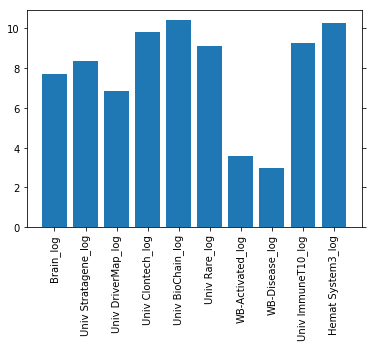

In [145]:
plt.bar(x=list(val_pd.columns),height=val_pd.iloc[0,:])
plt.xticks(rotation=90)

In [35]:
TEST=pd.cut(data_log['Brain_log'],bins,labels=labels)
TEST2=data_log.iloc[:,0]
TEST2=TEST2.rename('Brain')
TEST3=pd.concat([TEST,TEST2],axis=1)
TEST3=TEST3.reset_index()
TEST3g=TEST3.groupby(['Brain_log'])
TEST3g['target gene'].unique()['high']


array(['11799|RPL13A', '7790|TUBB2B', '12681|MT3', '1613|CALM1',
       '9034|UBC', '10676|SNURF', '1574|CALM2', '14335|SYT1',
       '11543|FTH1', '11909|HSP90AB1', '14717|TUBA1B', '14722|TUBB3',
       '6546|PTGDS', '10075|RPS21', '6806|RPL3', '7765|TSPAN7',
       '13851|RPL9', '13846|RPL31', '19075|MTRNR2L10', '3995|ENO2',
       '14802|VAMP2', '6128|PEBP1', '5347|MBP', '2015|CPE',
       '11211|EEF1A1', '6294|PLP1', '8535|GFAP', '1580|GNAS',
       '10057|RPL37', '10302|ATP1A1', '147|EIF4A2', '13848|RPL37A',
       '3587|CST3', '10129|ALDOA', '10307|UCHL1', '20270|HIST1H4E',
       '3858|DPYSL2', '10058|ACTB', '19025|CYCS', '20084|UBB',
       '6817|RPS14', '8522|GAPDH', '100195|TUBA1C', '1959|SNAP25',
       '8512|FTL', '100101|TUBB4A', '8053|YWHAH', '3925|EEF2', '746|CLU',
       '19614|NRGN', '6807|RPL34', '4466|GLUL', '2629|ALDOC', '6508|PSAP',
       '13876|RPS8', '100167|PBOV1', '2063|HSPA1A', '13892|RTN4',
       '3100|CALM3', '3923|EEF1A2', '9237|CDR1', '9978|PTMA', '3379|